<strong> Supervised Learning </strong><br><br>
Classification

<strong> Goals </strong>

Classify whether a transaction is fraudulent or not.

Data Description

| Features |Description 
| :-: | :-:
step   | maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation)
type| CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER
amount 	| amount of the transaction in local currency
nameOrig |  	customer who started the transaction
oldbalanceOrg |  	initial balance before the transaction
newbalanceOrig | 	new balance after the transaction
nameDest |	customer who is the recipient of the transaction
oldbalanceDest |  	initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants)
newbalanceDest | 	new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants)
isFraud | 	This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system
isFlaggedFraud |	The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('fraud detection.csv')

<h1> Exploratory Data Analysis (EDA) </h1>

In [2]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


<AxesSubplot:>

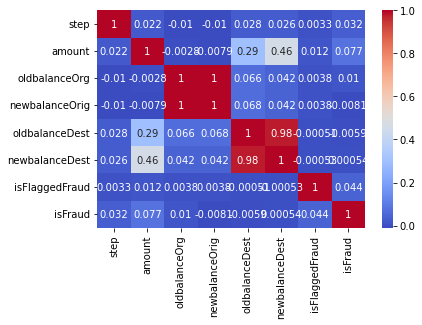

In [3]:
# Select the relevant features and target variable
features = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
            'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']
target = 'isFraud'

# Compute the correlation matrix
corr = df[features + [target]].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')


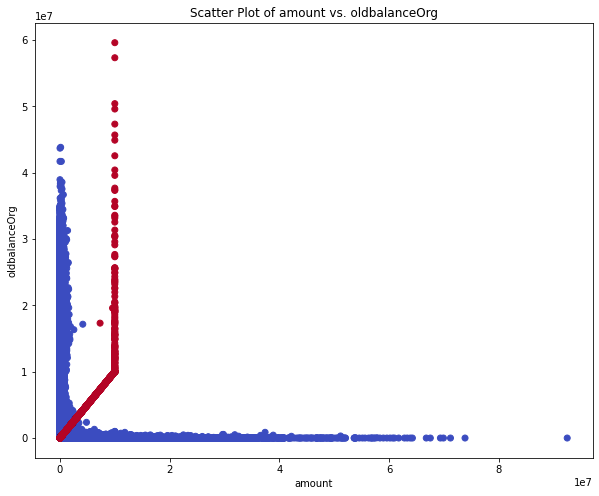

In [6]:
# Select the two features to visualize
feature1 = 'amount'
feature2 = 'oldbalanceOrg'

# Create a scatter plot of the two features
plt.figure(figsize=(10, 8))
plt.scatter(df[feature1], df[feature2], c=df['isFraud'], cmap='coolwarm')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Scatter Plot of {} vs. {}'.format(feature1, feature2))
plt.show()


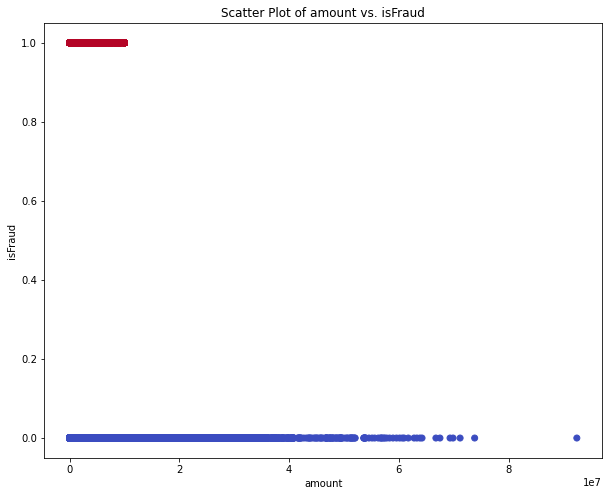

In [7]:
# Select the two features to visualize
feature1 = 'amount'
feature2 = 'isFraud'

# Create a scatter plot of the two features
plt.figure(figsize=(10, 8))
plt.scatter(df[feature1], df[feature2], c=df['isFraud'], cmap='coolwarm')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Scatter Plot of {} vs. {}'.format(feature1, feature2))
plt.show()


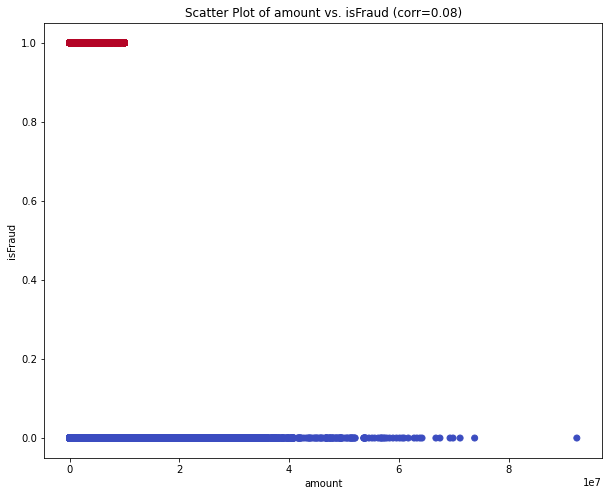

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the two features to visualize
feature1 = 'amount'
feature2 = 'isFraud'

# Compute the correlation coefficient between the two features
corr = df[feature1].corr(df[feature2])

# Create a scatter plot of the two features
plt.figure(figsize=(10, 8))
plt.scatter(df[feature1], df[feature2], c=df['isFraud'], cmap='coolwarm')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Scatter Plot of {} vs. {} (corr={:.2f})'.format(feature1, feature2, corr))
plt.show()


<AxesSubplot:xlabel='amount', ylabel='isFraud'>

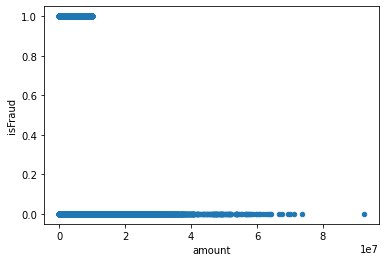

In [12]:
df.plot.scatter(x = 'amount', y = 'isFraud')

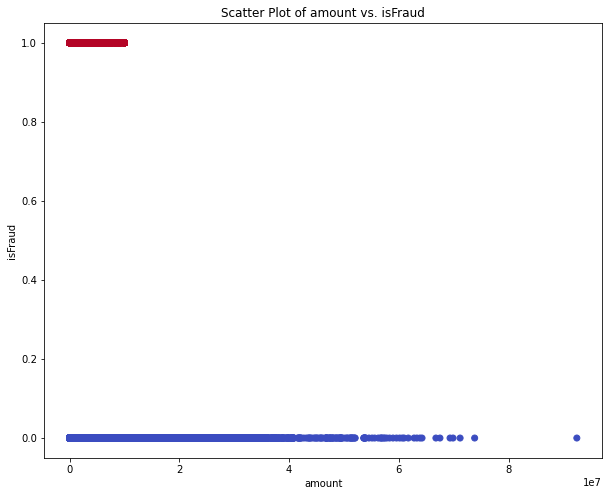

In [14]:
import pandas as pd
import matplotlib.pyplot as plt



# Select the two features to visualize
feature1 = 'amount'
feature2 = 'isFraud'

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a scatter plot of the two features
plt.scatter(df[feature1], df[feature2], c=df['isFraud'], cmap='coolwarm')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Scatter Plot of {} vs. {}'.format(feature1, feature2))
plt.show()


In [5]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [7]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

According to above info there are no such feature which have null value

In [11]:
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [19]:
# features which have dtypes object
df.select_dtypes(include = ['object']).head(3)

,type,nameOrig,nameDest
0,PAYMENT,C1231006815,M1979787155
1,PAYMENT,C1666544295,M2044282225
2,TRANSFER,C1305486145,C553264065


In [21]:
# Statistics description of each features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [ ]:
def filter_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    # Filter the outliers
    outliers = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

    return outliers


outliers = filter_outliers_iqr(df)
print(outliers)

In [3]:
# Checking each features description
dfDesc = []

for i in df.columns:
    dfDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        ((df[i].isna().sum())/len(df) *100).round(2),
        df[i].nunique(),
        df[i].drop_duplicates().head(4).values
    ])
print(df.shape[0])
pd.DataFrame(data = dfDesc, columns = ['Features', 'D types', 'Null', 'Null%', 'Unique', 'Unique Value'])

6362620


,Features,D types,Null,Null%,Unique,Unique Value
0,step,int64,0,0.0,743,"[1, 2, 3, 4]"
1,type,object,0,0.0,5,"[PAYMENT, TRANSFER, CASH_OUT, DEBIT]"
2,amount,float64,0,0.0,5316900,"[9839.64, 1864.28, 181.0, 11668.14]"
3,nameOrig,object,0,0.0,6353307,"[C1231006815, C1666544295, C1305486145, C84008..."
4,oldbalanceOrg,float64,0,0.0,1845844,"[170136.0, 21249.0, 181.0, 41554.0]"
5,newbalanceOrig,float64,0,0.0,2682586,"[160296.36, 19384.72, 0.0, 29885.86]"
6,nameDest,object,0,0.0,2722362,"[M1979787155, M2044282225, C553264065, C38997010]"
7,oldbalanceDest,float64,0,0.0,3614697,"[0.0, 21182.0, 41898.0, 10845.0]"
8,newbalanceDest,float64,0,0.0,3555499,"[0.0, 40348.79, 157982.12, 51513.44]"
9,isFraud,int64,0,0.0,2,"[0, 1]"


No missing values are detected on the dataset.<br>

NameDest is only half of the nameOrig, M stands for merchant which play a passive role during the simulation and the only functions they have is to serve the clients during cash in and cash out transactions.



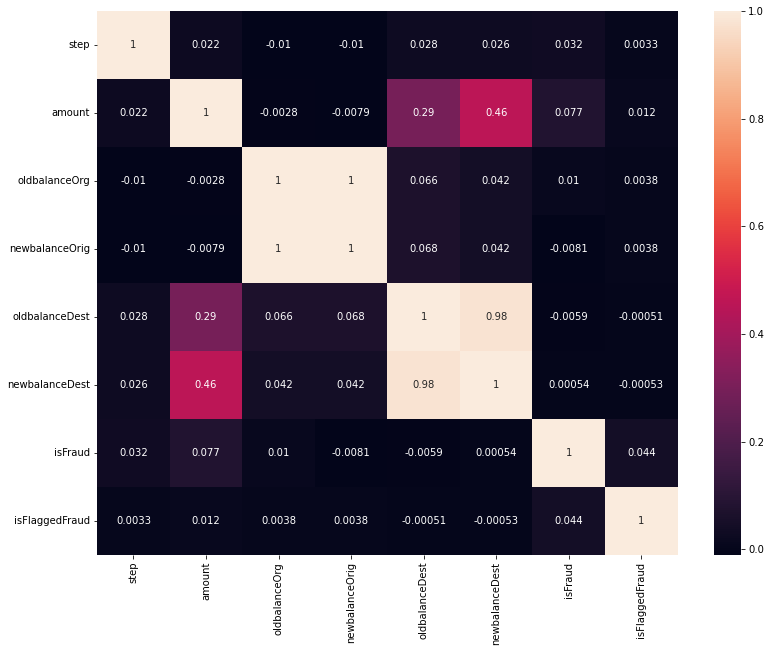

In [38]:
plt.figure(figsize=(13, 10))
sns.heatmap(df.corr(), annot=True);

From above info we can get different type of stats description corresponding each features

In [39]:
pd.crosstab(df['type'], df['isFraud'])

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


As shown by the the table above, fraud only happens whenever the type is "Cash out" or "Transfer."

In [64]:
# Data that just include CASH_OUT and TRANSFER
new_df = df[(df['type'] == 'CASH_OUT') | (df['type'] == 'TRANSFER')]
new_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [67]:
# Data of fraud transaction
df_fraud = df[df['isFraud']==1]
df_fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


0    6354407
1       8213
Name: isFraud, dtype: int64


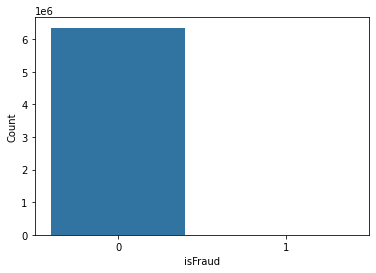

In [27]:
# count number of fraud and not fraud data
print(df.isFraud.value_counts())
sns.countplot(data=df, x='isFraud')
plt.ylabel('Count')
plt.show()


In [34]:
df.shape

(6362620, 11)

In [36]:
# non fradulent transactions are 
100*(6354407/6362620)


99.87091795518198

In [37]:
# fradulent transactions are 
100*(8213/6354407)

0.129248881917699

There is almost 99% - 0.1% distribution of target values. Total number of data point is 6362620 in which 8213 is fraud and 6354407 is not fraud data point.
Which means this is imbalanced datatset.

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


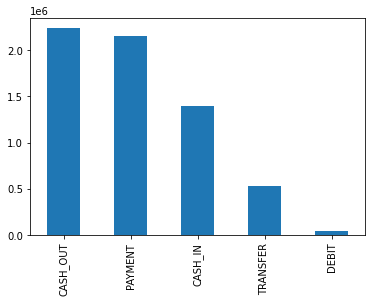

In [30]:
# Count number of data point in each type of transaction
print(df.type.value_counts())
df.type.value_counts().plot(kind='bar')
plt.show()

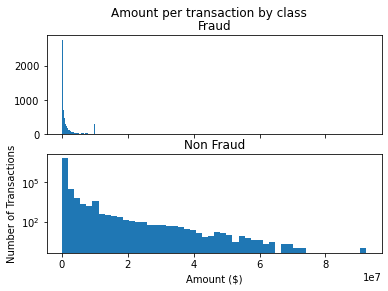

In [44]:
# Amount Vs number of transaction
fraud = df[df['isFraud']==1]
normal = df[df['isFraud']==0]
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.amount, bins = bins)
ax2.set_title('Non Fraud')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
# plt.xlim((0, 20000))
plt.yscale('log')
plt.show();


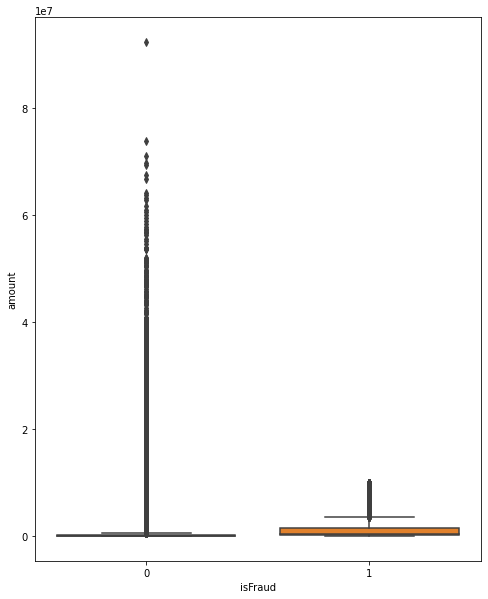

In [72]:
plt.figure(figsize=(8, 10))
sns.boxplot(x=df['isFraud'], y=df['amount'])
plt.show()

According to the above chart, there are less transaction amounts in fraud data than in non-fraud data.

In [56]:
pd.crosstab(index=df['type'], columns=df['isFlaggedFraud'])

isFlaggedFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2237500,0
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,532893,16


According to the data, the simulation can only flag 16 transaction transfers as fraudulent.

C:\Users\Binba\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



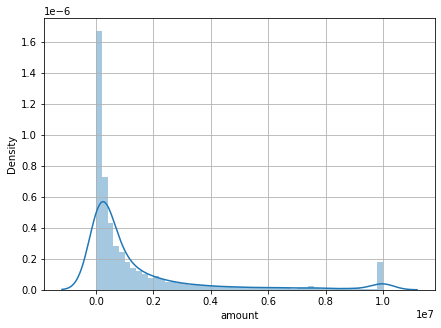

In [68]:
# Amount distribution of Fraud transaction
plt.figure(figsize=(7,5))
sns.distplot(df_fraud['amount'])
plt.grid()
plt.show()

The distribution of the amount involved in the fraudulent transaction was positively skewed.

<h3>OldbalanceOrg & OldbalanceDest</h3>

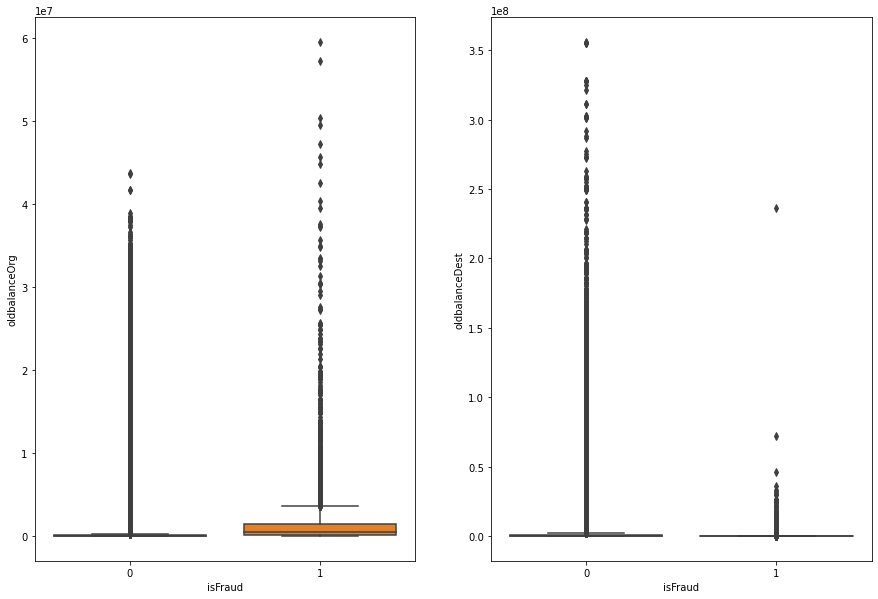

In [73]:
#OLD BALANCE = SENDER BALANCE BEFORE THE TRANSACTION HAPPEN
#OLD BALANCE DEST = RECEIVER BALANCE BEFORE THE TRANSACTION HAPPEN


plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
sns.boxplot(x=df['isFraud'], y=df['oldbalanceOrg'])

plt.subplot(1,2,2)
sns.boxplot(x=df['isFraud'], y=df['oldbalanceDest'])

plt.show()

<strong>·</strong>The fraud transaction of oldbalanceOrg has higher a payment than other

<strong>·</strong>while fraud transaction of oldbalanceDest has a lower than no fraud

<h3>NewbalanceOrig & NewbalanceDest</h3>

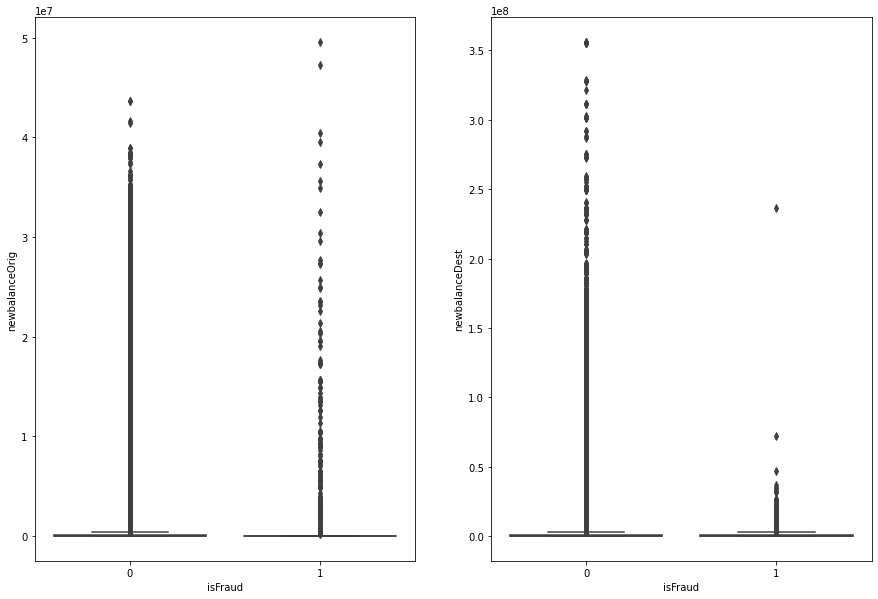

In [75]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
sns.boxplot(x=df['isFraud'], y=df['newbalanceOrig'])

plt.subplot(1,2,2)
sns.boxplot(x=df['isFraud'], y=df['newbalanceDest'])

plt.show()